## 作業

1. 試著調整 DecisionTreeClassifier(...) 中的參數，並觀察是否會改變結果？
2. 改用其他資料集 (boston, wine)，並與回歸模型的結果進行比較

In [1]:
from sklearn import datasets, metrics

# 如果是分類問題，請使用 DecisionTreeClassifier，若為回歸問題，請使用 DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.model_selection import train_test_split

## 1. 在 Iris dataset 中，設定 criterion = 'entropy' (default='gini')。
  * Accuracy 相同
  * feature_importances_ 有些微的差異

In [2]:
# 讀取鳶尾花資料集
iris = datasets.load_iris()

# 切分訓練集/測試集
x_train, x_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.25, random_state=4)

# 建立模型
clf = DecisionTreeClassifier(criterion='entropy')
# clf = DecisionTreeClassifier(criterion='gini')
# 訓練模型
clf.fit(x_train, y_train)

# 預測測試集
y_pred = clf.predict(x_test)

acc = metrics.accuracy_score(y_test, y_pred)
print("Acuuracy: ", acc)
print("Feature importance: ", clf.feature_importances_)

Acuuracy:  0.9736842105263158
Feature importance:  [0.         0.0156062  0.62264163 0.36175217]


## 2. 改用其他資料集 (boston, wine)，並與回歸模型的結果進行比較
  * 感覺上，是否因為 Iris and Wine 是個分類問題，所以應該適合用DecisionTreeClassifier( )，而 Boston 是個回歸問題，所以適用DecisionTreeRegressor( )?。但實際上測試時，發現雖然 Iris and Wine 是可以用 DecisionTreeClassifier( ) 和 DecisionTreeRegressor( ) 執行的。而 Boston 僅可以用 DecisionTreeRegressor( ) 執行的。
  * [討論](https://www.cupoy.com/qa/kwassist/ai_tw/00000168FB09F33F0000014B6375706F795F72656C656173655155455354)
    * Iris 的 label 型態是個數字 0-2 的 array，之前的問題串我們有討論過，不需要再特別去做 one-hot encoding (Scikit-learn 內部會自動幫我們做好)。如果是分類問題，這樣的 label 非常合理；但如果是回歸問題，這樣的 label 是可行的嗎？答案其實是可以！
    * 回歸問題只要我們的 Y (label) 是 continous 的即可，並沒有其他的限制。而 Scikit-learn 沒辦法確定這樣的 label 到底是回歸還是分類問題，使用時就不會報錯。雖然實務上不太可能會有這種 label 的回歸問題 (通常不太會有連續相同的數值，例如預測身高，不太可能整個班級每個人身高都一樣)，但的確有可能你是要做回歸問題且剛好你的 label 就是長這樣 (例如預測鉛筆厚度之類的...)，所以是可以正常訓練的。
    * 那為什麼 Regressor 可以，Classifier 就不能用在回歸問題上呢？因為 Scikit-learn 會使用這個 [function](https://github.com/scikit-learn/scikit-learn/blob/master/sklearn/utils/multiclass.py#L172) 來檢查你的 label 型態。但在理論上，你還是可以把分類模型用在回歸問題上，但這樣就會變成一個數值對應到一個類別，如果你有一百筆連續數值的資料 (不重複)，那就會有一百個 class (類別)，且每個 class 僅有一筆資料，聽起來是件非常荒謬的事情ＸＤ 從程式碼也可以看到，只要數值有 float，就會自動被默認成回歸問題，這時用 Scikit-learn 的分類模型來解，當然就會報錯囉。

In [3]:
# boston 

boston = datasets.load_boston()
x_train, x_test, y_train, y_test = train_test_split(boston.data, boston.target, test_size=0.25, random_state=4)
clf = DecisionTreeRegressor()
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
print("Mean squared error: %.2f" % metrics.mean_squared_error(y_test, y_pred))

Mean squared error: 31.35


In [4]:
boston = datasets.load_boston()
x_train, x_test, y_train, y_test = train_test_split(boston.data, boston.target, test_size=0.1, random_state=4)
regr = DecisionTreeRegressor()
regr.fit(x_train, y_train)
y_pred = regr.predict(x_test)
print("Mean squared error: %.2f" % metrics.mean_squared_error(y_test, y_pred))


Mean squared error: 24.27


In [5]:
# wine

wine = datasets.load_wine()
x_train, x_test, y_train, y_test = train_test_split(wine.data, wine.target, test_size=0.25, random_state=4)

clf = DecisionTreeRegressor()
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
acc = metrics.accuracy_score(y_test, y_pred)
print("回歸模型----")
print("Acuuracy: ", acc)
print("Feature importance: ", clf.feature_importances_)

print("\n分類模型----")
clf = DecisionTreeClassifier()
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
acc = metrics.accuracy_score(y_test, y_pred)
print("Acuuracy: ", acc)
print("Feature importance: ", clf.feature_importances_)

回歸模型----
Acuuracy:  0.9777777777777777
Feature importance:  [0.01285659 0.         0.         0.         0.         0.
 0.61367513 0.         0.         0.1214791  0.         0.
 0.25198917]

分類模型----
Acuuracy:  0.8444444444444444
Feature importance:  [0.03210079 0.03076567 0.         0.         0.04405085 0.08158611
 0.         0.         0.         0.33702516 0.         0.08582143
 0.38865   ]


## Question: 此例中，iris的 data set 不論是 gini or entropy，不同的 Min_samples_split 與 Min_samples_leaf，其準確率都依樣耶，MSE也是。這正常嗎?
  * 決策樹中 Min_samples_split 與 Min_samples_leaf，這兩個超參數主要是避免 Over-fitting 而設置的，當設置的太小就容易過擬合。
  * 回到 Iris 資料集來看，其實這是一個相對簡單的資料集，不同類別之間的差異性很大，因此只要簡單幾個 features 就可以把類別區分出來，當模型有一定水準後當然就會準確率就會收斂在一個數值，這時如果硬要把模型 train 的更準就有可能導致過擬合。你可以試著把這些值都調更高試試看，模型的預測能力就會明顯下降囉。之後用在比較困難且資料量比較大的資料集時，我相信決策樹跟隨機森林就不太可能會有一模一樣的結果了!

## 使用export_graphviz函式來將樹的實際長相視覺化

wine's features:
 ['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']


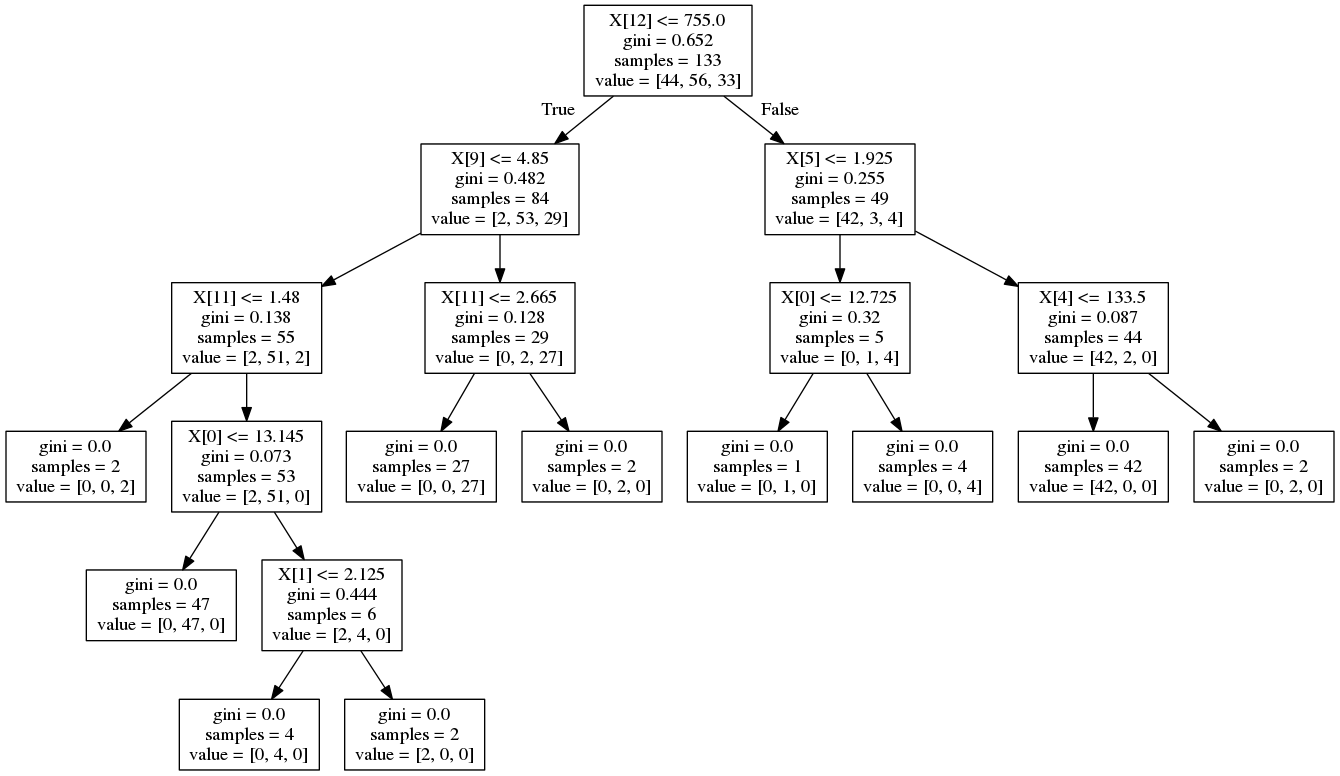

In [6]:
from sklearn.tree import export_graphviz
from IPython.display import Image  
import pydotplus

print("wine's features:\n", wine['feature_names'])
dot_data = export_graphviz(clf, out_file=None)
graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png())